In [1]:
from src.ManuallySelectedFeatureSet import ManuallySelectedFeatureSet
from src.PcaFeatureSet import PcaFeatureSet
from src.SomModelRunner import SomModelRunner
from src.model_runner import ModelRunner
from src.uci_har_dataset import UciHarDataset
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
%load_ext autoreload
%autoreload 2

In [2]:
dataset = UciHarDataset()

Loaded activity labels from data/UCI-HAR Dataset//activity_labels.txt
{1: 'WALKING', 2: 'WALKING_UPSTAIRS', 3: 'WALKING_DOWNSTAIRS', 4: 'SITTING', 5: 'STANDING', 6: 'LAYING'}
Loaded feature names from data/UCI-HAR Dataset//features.txt
Loaded features from data/UCI-HAR Dataset/train/X_train.txt. Shape: (7352, 561)
Loaded labels from data/UCI-HAR Dataset/train/y_train.txt. Shape: (7352, 1)
Loaded features from data/UCI-HAR Dataset/test/X_test.txt. Shape: (2947, 561)
Loaded labels from data/UCI-HAR Dataset/test/y_test.txt. Shape: (2947, 1)


In [49]:
manual_features = PcaFeatureSet(dataset, n_components=None)

runner = SomModelRunner(dataset, feature_set=manual_features,
                        x_size=32,
                        y_size=32,
                        sigma=5.0,
                        lr=0.1,
                        topology='rectangular')
runner.run(iterations=20000, num_examples=1000)


Training SOM(32x32) for 20000 iterations


/home/dveduard/projects/unsupervised-activity-clustering/.venv/lib/python3.13/site-packages/minisom.py:447: ComplexWarning: Casting complex values to real discards the imaginary part
  self._weights[i, j] = c1*pc[pc_order[0]] + \


 [ 20000 / 20000 ] 100% - 0:00:00 left 
 quantization error: 2.824145738854142

Quantization Error: 2.8241
Topographic Error:  0.0000


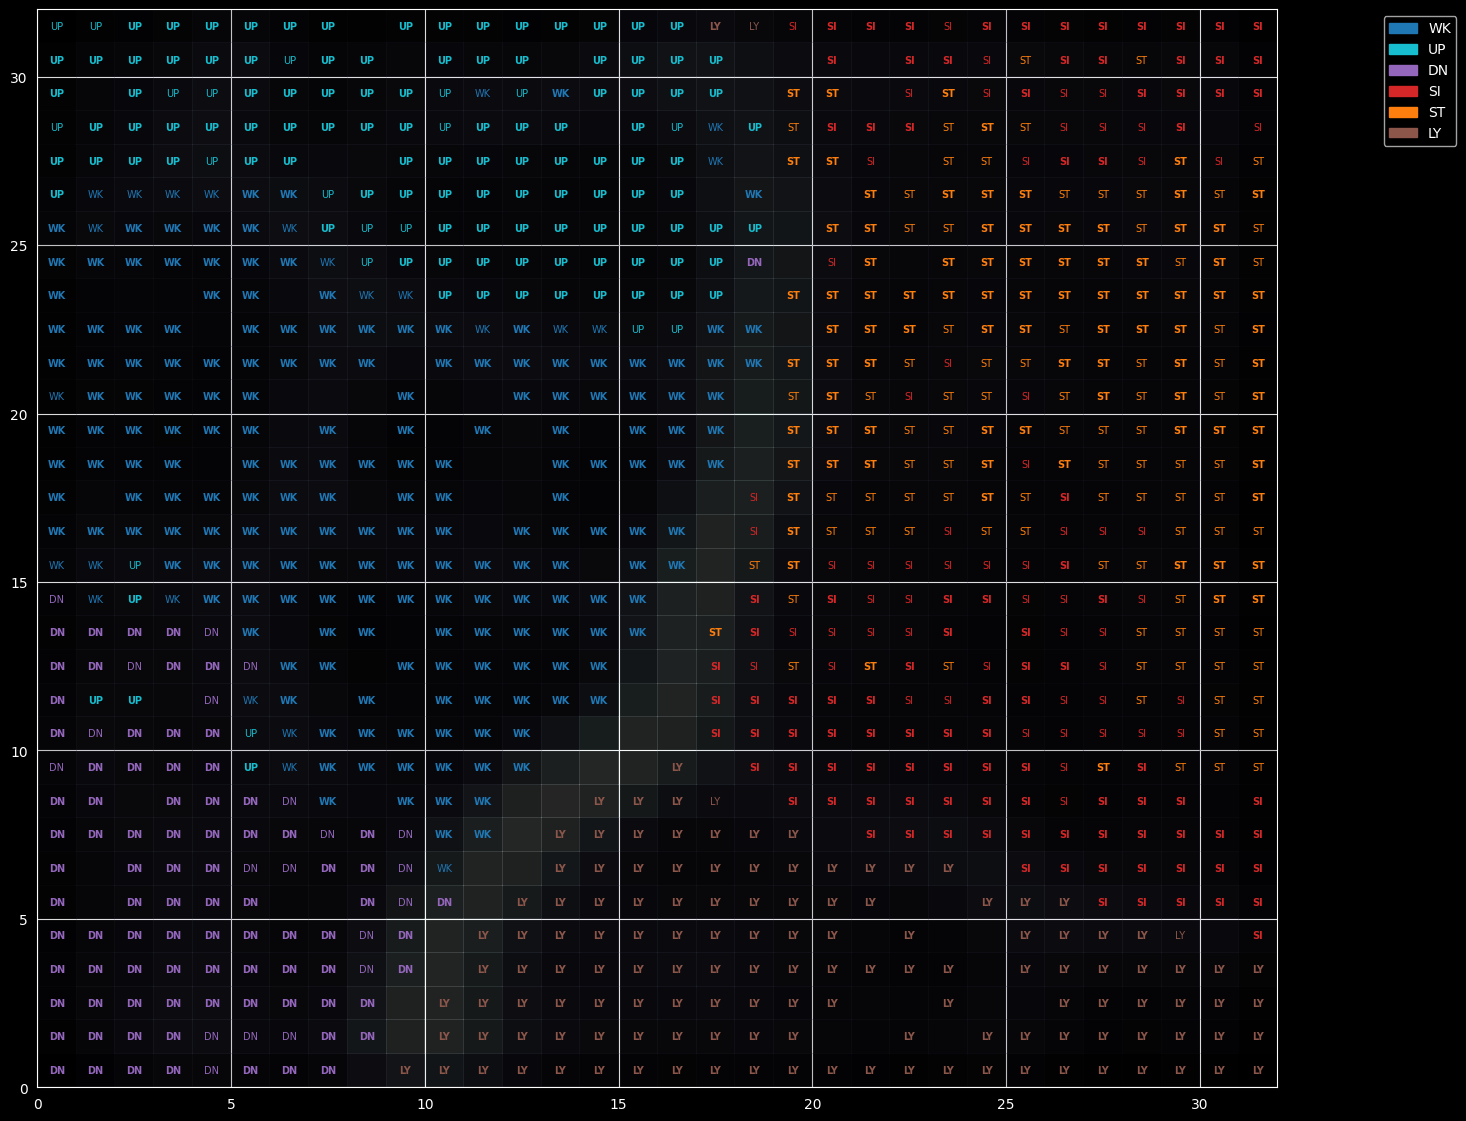

Test Accuracy: 0.8029
                    precision    recall  f1-score   support

           WALKING       0.75      0.87      0.80       496
  WALKING_UPSTAIRS       0.87      0.71      0.78       471
WALKING_DOWNSTAIRS       0.82      0.78      0.80       420
           SITTING       0.76      0.63      0.69       491
          STANDING       0.72      0.84      0.77       532
            LAYING       0.93      0.96      0.95       537

          accuracy                           0.80      2947
         macro avg       0.81      0.80      0.80      2947
      weighted avg       0.81      0.80      0.80      2947



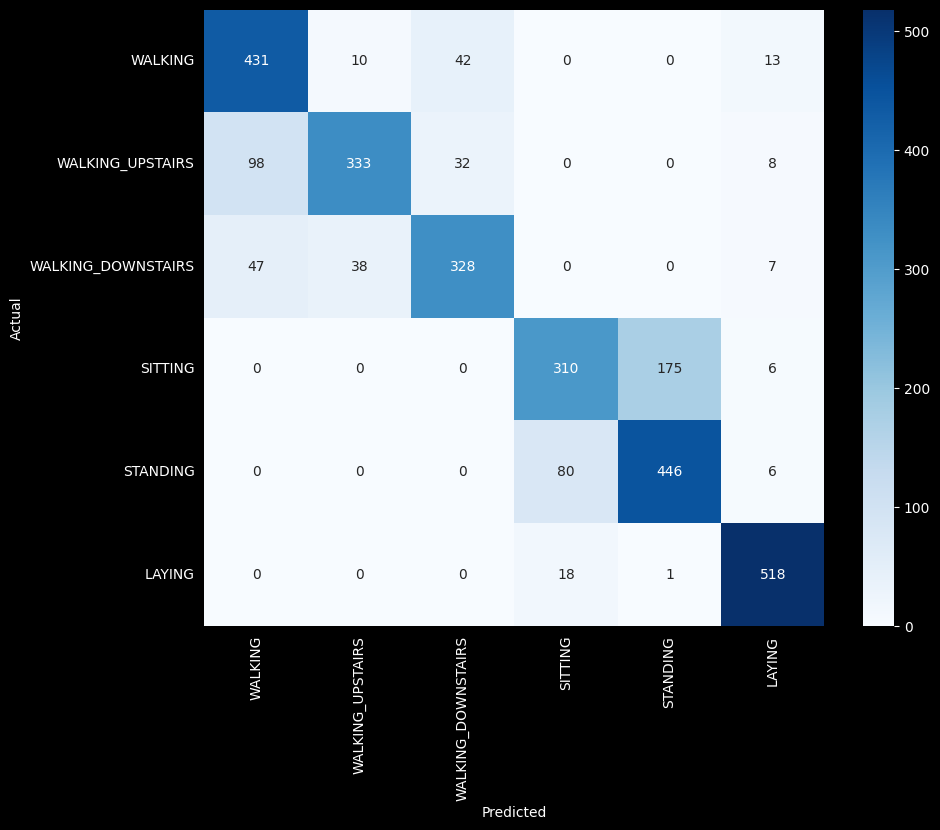

0.8028503562945368

In [50]:
# runner.plot_u_matrix()
# runner.plot_hit_map()
runner.plot_labeled_grid()
runner.evaluate_test_set()